In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
plt.style.use('~/matplotlib.mplstyle')
from scipy.linalg import norm


In [2]:
vasiliev_path = '../../vasiliev23LMC/'

vasL2M10 = np.loadtxt(vasiliev_path + 'L2M10/trajlmc.txt')
vasL2M11 = np.loadtxt(vasiliev_path + 'L2M11/trajlmc.txt')
vasL3M10 = np.loadtxt(vasiliev_path + 'L3M10/trajlmc.txt')
vasL3M11 = np.loadtxt(vasiliev_path + 'L3M11/trajlmc.txt')

In [3]:
np.shape(vasL2M10)

(1409, 7)

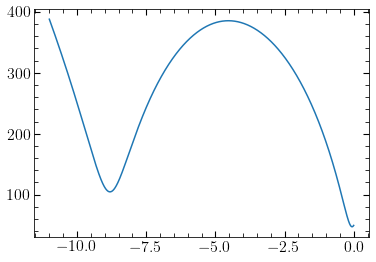

In [4]:
plt.plot(vasL2M10[:,0], norm(vasL2M10[:,1:4], axis=1))

In [5]:
norm(vasL2M10[780][1:4])

383.51994859557334

In [6]:
vasL2M10[780]

array([ -4.90625,  10.10026, 332.26044, 191.2813 ,  11.30342,  33.61862,
       -36.72056])

In [8]:
petersen_path = '../analysis/mssa/petersen/'
LLMC21 = np.loadtxt(petersen_path + 'lmc.orient.run26mldf.smth', skiprows=1)
LMW21 = np.loadtxt(petersen_path + 'mw.orient.run26mldf.smth', skiprows=1)


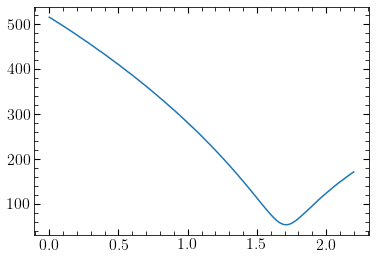

In [9]:
L21_LMCpos = norm(LLMC21[:,1:4] - LMW21[:,1:4], axis=1)
L21_LMCvel = norm(LLMC21[:,4:7] - LMW21[:,4:7], axis=1)


plt.plot(LMW21[:,0], L21_LMCpos*230)

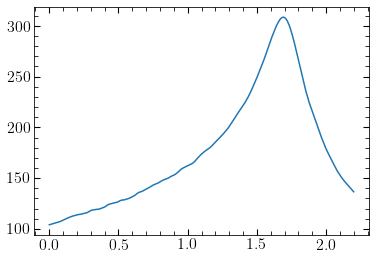

In [10]:
plt.plot(LMW21[:,0], L21_LMCvel*120)

In [11]:
nico_path = '../data/orbits/'

In [12]:
nLMC3b0_host = np.loadtxt(nico_path + 'LMC3_orbit_host.txt' )
nLMC4b0_host = np.loadtxt(nico_path + 'LMC4_orbit_host.txt' )
nLMC5b0_host = np.loadtxt(nico_path + 'LMC5_orbit_host.txt' )
nLMC6b0_host = np.loadtxt(nico_path + 'LMC6_orbit_host.txt' )

nLMC3b0 = np.loadtxt(nico_path + 'LMC3_orbit_satellite.txt' )
nLMC4b0 = np.loadtxt(nico_path + 'LMC4_orbit_satellite.txt' )
nLMC5b0 = np.loadtxt(nico_path + 'LMC5_orbit_satellite.txt' )
nLMC6b0 = np.loadtxt(nico_path + 'LMC6_orbit_satellite.txt' )

In [13]:
tNGC = np.arange(0, 400, 5)*0.02


In [78]:
nLMC3b0_host_interp = np.zeros((len(tinterp), 7))
nLMC4b0_host_interp = np.zeros((len(tinterp), 7))
nLMC5b0_host_interp = np.zeros((len(tinterp), 7))
nLMC6b0_host_interp = np.zeros((len(tinterp), 7))

nLMC3b0_sat_interp = np.zeros((len(tinterp), 7))
nLMC4b0_sat_interp = np.zeros((len(tinterp), 7))
nLMC5b0_sat_interp = np.zeros((len(tinterp), 7))
nLMC6b0_sat_interp = np.zeros((len(tinterp), 7))

for k in range(6):
    f1h = interpolate.interp1d(tNGC, nLMC3b0_host[:,k], kind='cubic')
    f2h = interpolate.interp1d(tNGC, nLMC4b0_host[:,k], kind='cubic')
    f3h = interpolate.interp1d(tNGC, nLMC5b0_host[:,k], kind='cubic')
    f4h = interpolate.interp1d(tNGC, nLMC6b0_host[:,k], kind='cubic')
    f1s = interpolate.interp1d(tNGC, nLMC3b0[:,k], kind='cubic')
    f2s = interpolate.interp1d(tNGC, nLMC4b0[:,k], kind='cubic')
    f3s = interpolate.interp1d(tNGC, nLMC5b0[:,k], kind='cubic')
    f4s = interpolate.interp1d(tNGC, nLMC6b0[:,k], kind='cubic')
    nLMC3b0_host_interp[:,k+1] = f1h(tinterp)
    nLMC4b0_host_interp[:,k+1] = f2h(tinterp)
    nLMC4b0_host_interp[:,k+1] = f3h(tinterp)
    nLMC5b0_host_interp[:,k+1] = f4h(tinterp)

    nLMC3b0_sat_interp[:,k+1] = f1s(tinterp)
    nLMC4b0_sat_interp[:,k+1] = f2s(tinterp)
    nLMC4b0_sat_interp[:,k+1] = f3s(tinterp)
    nLMC5b0_sat_interp[:,k+1] = f4s(tinterp)
    
    

In [72]:
f1 = interpolate.interp1d(tNGC, norm(nLMC3b0[:,0:3]-nLMC3b0_host[:,0:3], axis=1), kind='cubic')
f2 = interpolate.interp1d(tNGC, norm(nLMC4b0[:,0:3]-nLMC4b0_host[:,0:3], axis=1), kind='cubic')
f3 = interpolate.interp1d(tNGC, norm(nLMC5b0[:,0:3]-nLMC5b0_host[:,0:3], axis=1), kind='cubic')
f4 = interpolate.interp1d(tNGC, norm(nLMC6b0[:,0:3]-nLMC6b0_host[:,0:3], axis=1), kind='cubic')


f1v = interpolate.interp1d(tNGC, norm(nLMC3b0[:,3:6]-nLMC3b0_host[:,3:6], axis=1), kind='cubic')
f2v = interpolate.interp1d(tNGC, norm(nLMC4b0[:,3:6]-nLMC4b0_host[:,3:6], axis=1), kind='cubic')
f3v = interpolate.interp1d(tNGC, norm(nLMC5b0[:,3:6]-nLMC5b0_host[:,3:6], axis=1), kind='cubic')
f4v = interpolate.interp1d(tNGC, norm(nLMC6b0[:,3:6]-nLMC6b0_host[:,3:6], axis=1), kind='cubic')

In [71]:
tinterp = np.arange(0, 396, 1)*0.02

In [33]:
(nLMC3b0[:,0:3]-nLMC3b0_host[:,0:3]).shape

(80, 3)

In [81]:
np.savetxt(nico_path + "LMC3_orbit_host_interp.txt", nLMC3b0_host_interp[:,1:7])
np.savetxt(nico_path + "LMC4_orbit_host_interp.txt", nLMC4b0_host_interp[:,1:7])
np.savetxt(nico_path + "LMC5_orbit_host_interp.txt", nLMC5b0_host_interp[:,1:7])
np.savetxt(nico_path + "LMC6_orbit_host_interp.txt", nLMC6b0_host_interp[:,1:7])

np.savetxt(nico_path + "LMC3_orbit_sat_interp.txt", nLMC3b0_sat_interp[:,1:7])
np.savetxt(nico_path + "LMC4_orbit_sat_interp.txt", nLMC4b0_sat_interp[:,1:7])
np.savetxt(nico_path + "LMC5_orbit_sat_interp.txt", nLMC5b0_sat_interp[:,1:7])
np.savetxt(nico_path + "LMC6_orbit_sat_interp.txt", nLMC6b0_sat_interp[:,1:7])

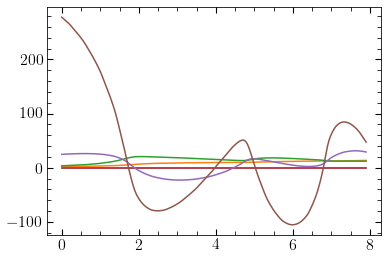

In [ ]:
np.savetxt(np.array([tinterp, ]))

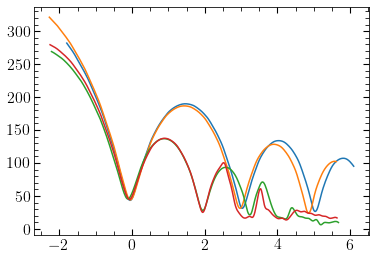

In [73]:
plt.plot(tinterp-tinterp[90], f1(tinterp))
plt.plot(tinterp-tinterp[114], f2(tinterp))
plt.plot(tinterp-tinterp[111], f3(tinterp))
plt.plot(tinterp-tinterp[113], f4(tinterp))


#plt.plot(LMW21[:,0]-1.8, L21_LMCpos*220)


In [17]:
np.shape(nLMC3b0)
t = np.arange(-3.02, 0, 0.02) 
t2 = np.arange(-3.02, 5, 0.02) 

In [18]:
len(t)

151

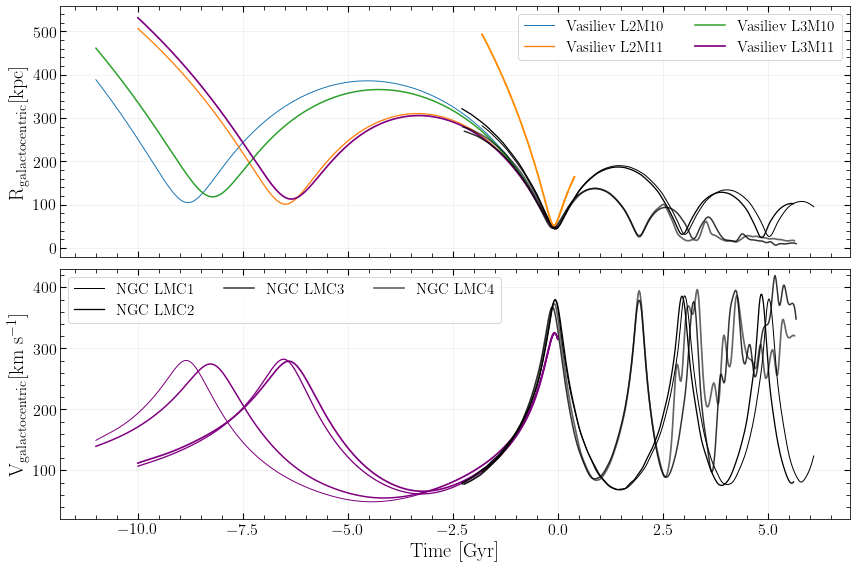

In [25]:
fig, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

ax[0].plot(vasL2M10[:,0], np.sqrt(np.sum(vasL2M10[:,1:4]**2, axis=1)), label=r'$\rm{Vasiliev\ L2M10}$', 
           c='C0', lw=1)
ax[0].plot(vasL2M11[:,0], np.sqrt(np.sum(vasL2M11[:,1:4]**2, axis=1)), label=r'$\rm{Vasiliev\ L2M11}$', c='C1', 
           lw=1.3)
ax[0].plot(vasL3M10[:,0], np.sqrt(np.sum(vasL3M10[:,1:4]**2, axis=1)), label=r'$\rm{Vasiliev\ L3M10}$', c='C2',
           lw = 1.5)
ax[0].plot(vasL3M11[:,0], np.sqrt(np.sum(vasL3M11[:,1:4]**2, axis=1)), label=r'$\rm{Vasiliev\ L3M11}$', c='purple',
          lw=1.7)


ax[0].plot(tinterp-tinterp[90], f1(tinterp), c='k', lw=1)
ax[0].plot(tinterp-tinterp[114], f2(tinterp), c='k', lw=1.3, alpha=1)
ax[0].plot(tinterp-tinterp[111], f3(tinterp), c='k', lw=1.5, alpha=0.8)
ax[0].plot(tinterp-tinterp[113], f4(tinterp), c='k', lw=1.7, alpha=0.6)


ax[0].plot(LMW21[:,0]-1.8, L21_LMCpos*220, c='darkorange', lw=1.8)


ax[0].legend(ncol=2, fontsize=15)
ax[0].grid(alpha=0.2)

ax[1].set_xlabel(r'$\rm{Time\ [Gyr]}$')
ax[0].set_ylabel(r'$\rm{R_{galactocentric} [kpc]}$')
ax[1].set_ylabel(r'$\rm{V_{galactocentric} [km\ s^{-1}]}$')



ax[1].plot(vasL2M10[:,0], np.sqrt(np.sum(vasL2M10[:,4:7]**2, axis=1)), 
           c='purple', lw=1)
ax[1].plot(vasL2M11[:,0], np.sqrt(np.sum(vasL2M11[:,4:7]**2, axis=1)),c='purple', 
           lw=1.3)
ax[1].plot(vasL3M10[:,0], np.sqrt(np.sum(vasL3M10[:,4:7]**2, axis=1)), c='purple',
           lw = 1.5)
ax[1].plot(vasL3M11[:,0], np.sqrt(np.sum(vasL3M11[:,4:7]**2, axis=1)), c='purple',
          lw=1.7)




ax[1].plot(tinterp-tinterp[90], f1v(tinterp), c='k', lw=1, label=r'$\rm{NGC\ LMC1}$')
ax[1].plot(tinterp-tinterp[114], f2v(tinterp), c='k', lw=1.3, alpha=1, label=r'$\rm{NGC\ LMC2}$')
ax[1].plot(tinterp-tinterp[111], f3v(tinterp), c='k', lw=1.5, alpha=0.8, label=r'$\rm{NGC\ LMC3}$')
ax[1].plot(tinterp-tinterp[113], f4v(tinterp), c='k', lw=1.7, alpha=0.6, label=r'$\rm{NGC\ LMC4}$')

#ax[1].plot(LMW21[:,0]-1.8, L21_LMCvel*160, c='darkorange', lw=1.8, label=r'$\rm{Lilleengen\ 21}$')


ax[1].grid(alpha=0.2)
ax[1].legend(ncol=3, fontsize=15)
ax[1].set_ylim(20, 430)


#ax[1].plot(nLMC3b0[:,7]-nLMC3b0[:,1], nLMC3b0[:,8]-nLMC3b0[:,2], ls='--', lw=2, label=r'$\rm{GC19\ LMC1}$')
#ax[1].plot(nLMC4b0[:,7]-nLMC4b0[:,1], nLMC4b0[:,8]-nLMC4b0[:,2], ls='--', lw=2, label=r'$\rm{GC19\ LMC2}$')
#ax[1].plot(nLMC5b0[:,7]-nLMC5b0[:,1], nLMC5b0[:,8]-nLMC5b0[:,2], ls='--', lw=2, label=r'$\rm{GC19\ LMC3}$')
#ax[1].plot(nLMC6b0[:,7]-nLMC6b0[:,1], nLMC6b0[:,8]-nLMC6b0[:,2], ls='--', lw=2, label=r'$\rm{GC19\ LMC4}$')

#ax[0].axvline(0, ls=':', c='k', alpha=0.6)

plt.tight_layout()

plt.savefig('all_LMC_orbits.pdf', bbox_inches='tight')


In [173]:
# 

#def escape_velocity(dist, model):
#    if model == 'GC23':
        

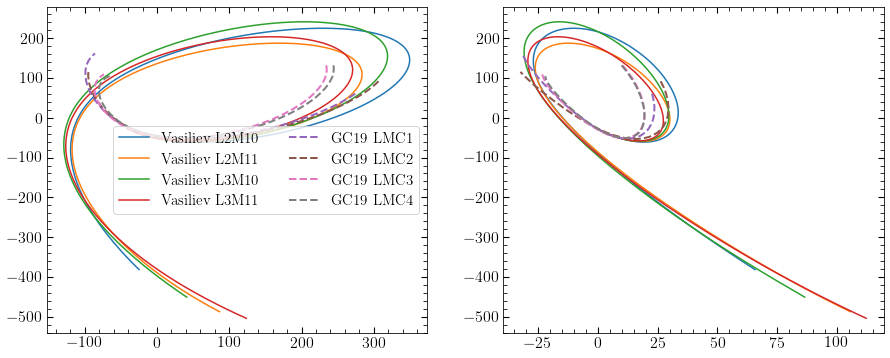

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
ax[0].plot(vasL2M10[:,2], vasL2M10[:,3], label=r'$\rm{Vasiliev\ L2M10}$')
ax[0].plot(vasL2M11[:,2], vasL2M11[:,3], label=r'$\rm{Vasiliev\ L2M11}$')
ax[0].plot(vasL3M10[:,2], vasL3M10[:,3], label=r'$\rm{Vasiliev\ L3M10}$')
ax[0].plot(vasL3M11[:,2], vasL3M11[:,3], label=r'$\rm{Vasiliev\ L3M11}$')


ax[0].plot(nLMC3b0[:,7]-nLMC3b0[:,1], nLMC3b0[:,8]-nLMC3b0[:,2], ls='--', lw=2, label=r'$\rm{GC19\ LMC1}$')
ax[0].plot(nLMC4b0[:,7]-nLMC4b0[:,1], nLMC4b0[:,8]-nLMC4b0[:,2], ls='--', lw=2, label=r'$\rm{GC19\ LMC2}$')
ax[0].plot(nLMC5b0[:,7]-nLMC5b0[:,1], nLMC5b0[:,8]-nLMC5b0[:,2], ls='--', lw=2, label=r'$\rm{GC19\ LMC3}$')
ax[0].plot(nLMC6b0[:,7]-nLMC6b0[:,1], nLMC6b0[:,8]-nLMC6b0[:,2], ls='--', lw=2, label=r'$\rm{GC19\ LMC4}$')



ax[1].plot(vasL2M10[:,1], vasL2M10[:,3], label=r'$\rm{Vasiliev\ L2M10}$')
ax[1].plot(vasL2M11[:,1], vasL2M11[:,3], label=r'$\rm{Vasiliev\ L2M11}$')
ax[1].plot(vasL3M10[:,1], vasL3M10[:,3], label=r'$\rm{Vasiliev\ L3M10}$')
ax[1].plot(vasL3M11[:,1], vasL3M11[:,3], label=r'$\rm{Vasiliev\ L3M11}$')


ax[1].plot(nLMC3b0[:,6]-nLMC3b0[:,0], nLMC3b0[:,8]-nLMC3b0[:,2], ls='--', lw=2, label=r'$\rm{GC19\ LMC1}$')
ax[1].plot(nLMC4b0[:,6]-nLMC4b0[:,0], nLMC4b0[:,8]-nLMC4b0[:,2], ls='--', lw=2, label=r'$\rm{GC19\ LMC2}$')
ax[1].plot(nLMC5b0[:,6]-nLMC5b0[:,0], nLMC5b0[:,8]-nLMC5b0[:,2], ls='--', lw=2, label=r'$\rm{GC19\ LMC3}$')
ax[1].plot(nLMC6b0[:,6]-nLMC6b0[:,0], nLMC6b0[:,8]-nLMC6b0[:,2], ls='--', lw=2, label=r'$\rm{GC19\ LMC4}$')

ax[0].legend(ncol=2, fontsize=15)

In [ ]:
plt.plot()